In [2]:
import numpy as np
import pandas as pd
import material as ml
import thinfilm as tm
import matplotlib.pyplot as plt
from scipy.optimize import differential_evolution

layer0 = pd.read_csv('spectrum/Nanya/2IM/layer0.csv')['SCAN']
layer1 = pd.read_csv('spectrum/Nanya/2IM/layer1.csv')['SCAN'].values
layer2 = pd.read_csv('spectrum/Nanya/2IM/layer2.csv')['SCAN'].values
layer3 = pd.read_csv('spectrum/Nanya/2IM/layer3.csv')['SCAN'].values
layer4 = pd.read_csv('spectrum/Nanya/2IM/layer4.csv')['SCAN'].values

glass = ml.open_material('sodalime_Nanya','Material')
glass_T = layer0.values/100

T = 2*glass_T/(glass_T+1)
R = 1-T
n = (np.sqrt(R)+1)/(1-np.sqrt(R))

L1 = 1/(1/(layer1/100)-1/T+1)
L2 = 1/(1/(layer2/100)-1/T+1)
L3 = 1/(1/(layer3/100)-1/T+1)
L4 = 1/(1/(layer4/100)-1/T+1)

void = ml.Non_Dispersion(1)
NB = ml.open_material('Nb2O5_Nanya', 'Material')
SiO2 = ml.open_material('SiO2_Nanya', 'Material')
ITO = ml.open_material('ITO_Nanya', 'Material')

wl = np.linspace(400,700,301)

In [3]:
w = np.linspace(400,700,31)
N1 = [88.27,88.38,88.6,88.77,88.98,89.83,89.79,89.63,89.79,89.96,90.09,90.18,90.33,90.39,90.49,90.56,90.63,90.67,90.71,90.76,90.78,90.76,90.79,90.79,90.84,90.81,90.85,90.88,90.78,90.61,90.99]

In [6]:
s = ml.sellmeier_fitting(wl, n)

requested number of basinhopping iterations completed successfully


In [9]:
print(s)

[  2.87936267 -21.90452168  -2.91132506 -14.96127058   3.08739277
  21.27466584  68.18591151]


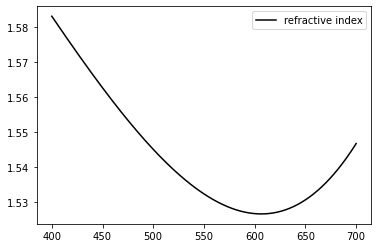

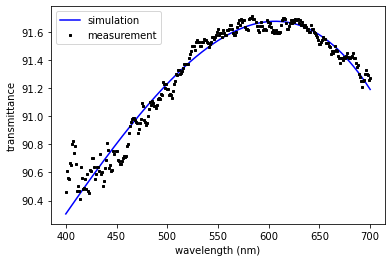

In [7]:
ng = ml.Sellmeier(s)
plt.plot(wl, ng.nvalues(wl), '-k',label = 'refractive index')
plt.legend(loc = 'best')
#plt.savefig('Nanya_normal_glass_n.png')
plt.show()

plt.plot(wl,100*tm.sec_transmit(tm.Design([void, ng],[None, None]),wl), '-b',label = 'simulation')
plt.plot(wl, layer0, 'ks', label = 'measurement', markersize = 2)
plt.legend(loc = 'best')
plt.xlabel('wavelength (nm)')
plt.ylabel('transmittance')
#plt.savefig('Nanya_normal_glass_fitting.png')
plt.show()

In [132]:
La1 = lambda th: tm.sec_transmit(
    tm.Design(
        [void, NB, ng],
        [None, th[0], None]
    ), wl
)

fom = lambda th: sum(abs(La1(th) - layer1/100))
sol = differential_evolution(fom, [(0,10)])

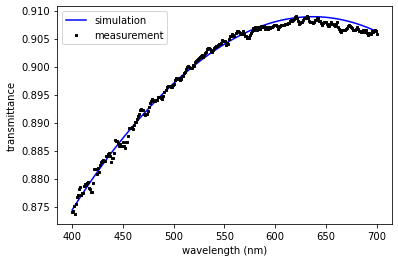

[7.49853458]


In [190]:
plt.plot(wl, La1(sol.x), '-b',label = 'simulation')
plt.plot(wl, layer1/100, 'ks', label = 'measurement', markersize = 2)
plt.xlabel('wavelength (nm)')
plt.ylabel('transmittance')
plt.legend(loc = 'best')
plt.savefig('Nanya_layer1_fitting.png')
plt.show()
print(sol.x)

In [ ]:
La2 = lambda th: tm.sec_transmit(
    tm.Design(
        [void, SiO2, NB, ng],
        [None, th[0], th[1],None]
    ), wl
)

fom2 = lambda th: np.mean(abs(La2(th) - layer2/100))
sol2 = differential_evolution(fom, [(0,100),(7.5,7.51)])

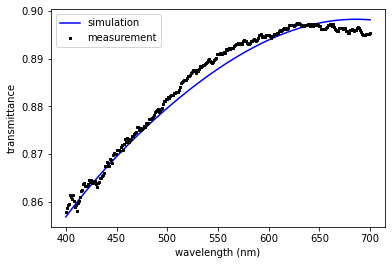

In [195]:
plt.plot(wl, La2([40, 7.5]), '-b', label = 'simulation')
plt.plot(wl, layer2/100, 'ks',label = 'measurement', markersize = 2)
plt.xlabel('wavelength (nm)')
plt.ylabel('transmittance')
plt.legend(loc = 'best')
plt.savefig('Nanya_layer2_fitting.png')
plt.show()
#print(sol2.x)

In [ ]:
La3 = lambda th: tm.Design(
    [void, ITO, SiO2, NB, ng],
    [None, th[0], th[1], th[2], None]
).transmittance(wl)

fom3 = lambda th: sum(abs(La3(th) - L3))
sol3 = differential_evolution(fom3, [(0,40),(40,41),(7.6,7.61)])

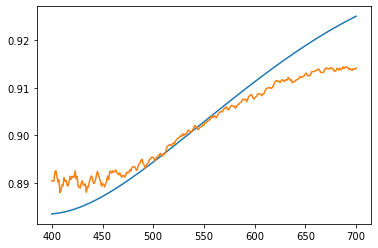

[13.65653012 41.4         7.61      ]


In [171]:
plt.plot(wl, La3([13.5,40,7.5]))
plt.plot(wl, L3)
plt.show()
print(sol3.x)

In [ ]:
La4 = lambda th: tm.Design(
    [void, SiO2, ITO, SiO2, NB, ng],
    [None, th[0], th[1], th[2], th[3], None]
).transmittance(wl)

fom4 = lambda th: sum(abs(La4(th) - L4))
sol4 = differential_evolution(fom3, [(20,30),(30,35),(24,30),(7.6,7.61)])

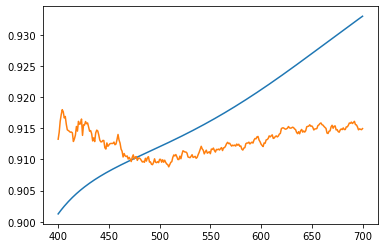

In [203]:
plt.plot(wl, La4([30,13,40,7.5]))
plt.plot(wl, L4)
plt.show()
#print(sol4.x)